# 🧪 Taller - De Pixels a Coordenadas: Explorando la Imagen como Matriz

🔍 **Objetivo del taller**

Comprender cómo se representa una imagen digital como una matriz numérica y manipular sus componentes a nivel de píxel. Se trabaja con OpenCV y NumPy para modificar regiones, analizar colores y ajustar brillo/contraste.

In [37]:
# 📦 Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mostrar imágenes con Matplotlib en Colab
def mostrar_img(img, cmap=None):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

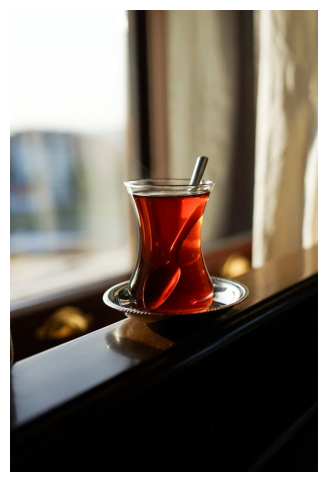

✅ Imagen cargada correctamente


In [38]:
# 📁 Cargar imagen (modifica esta ruta con tu imagen)
ruta_imagen = '../datos/foto.jpg'
img = cv2.imread(ruta_imagen)

# Validar carga
if img is None:
    print("❌ No se pudo cargar la imagen. Verifica la ruta.")
else:
    mostrar_img(img)
    print("✅ Imagen cargada correctamente")

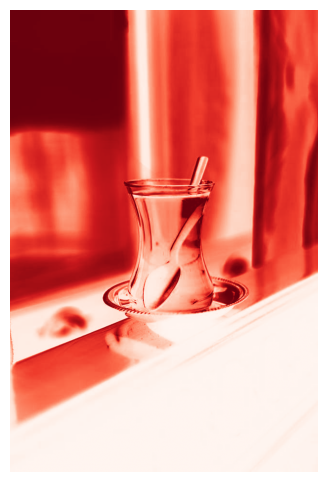

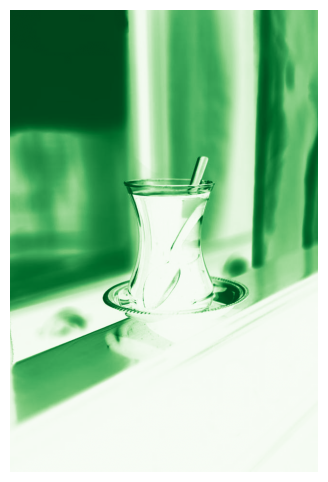

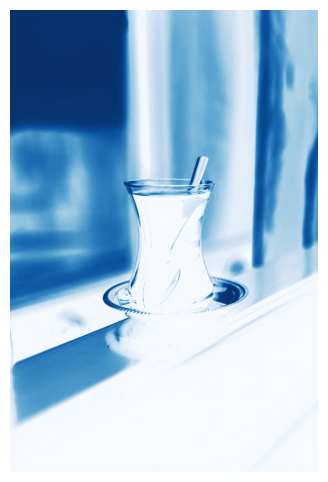

In [39]:
# 🎨 Separar canales BGR (y mostrar RGB)
b, g, r = cv2.split(img)

mostrar_img(r, cmap='Reds')
mostrar_img(g, cmap='Greens')
mostrar_img(b, cmap='Blues')

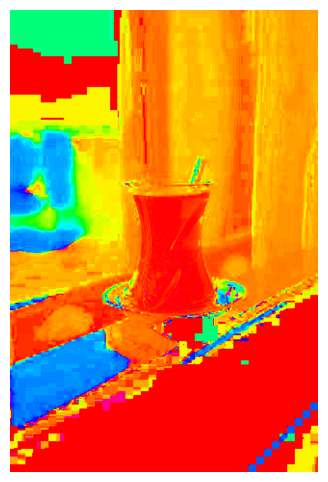

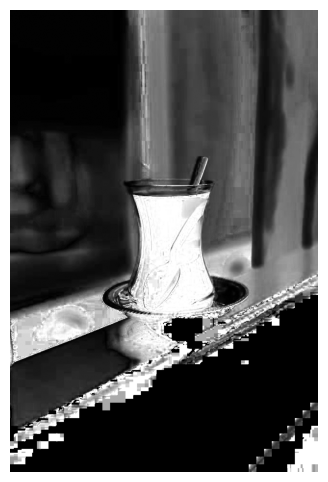

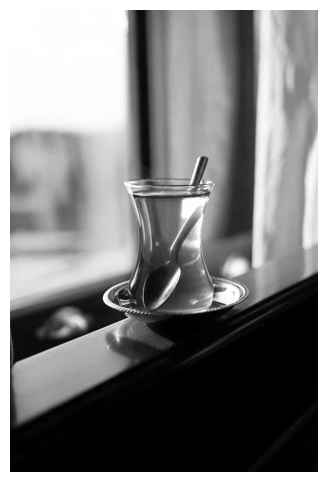

In [40]:
# 🌈 Convertir a HSV y mostrar canales
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

mostrar_img(h, cmap='hsv')
mostrar_img(s, cmap='gray')
mostrar_img(v, cmap='gray')

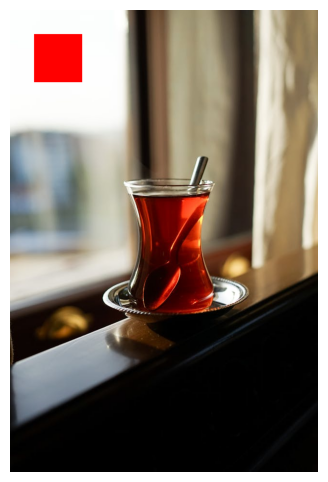

In [41]:
# ✂️ Modificar región (slicing)
modificada = img.copy()
modificada[50:150, 50:150] = [0, 0, 255]  # rojo puro (en BGR)
mostrar_img(modificada)

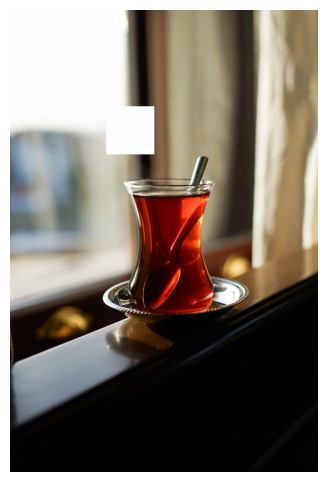

In [42]:
# 🔁 Copiar región de una parte a otra
copia = img.copy()
region = copia[0:100, 0:100]  # Parte superior izquierda
copia[200:300, 200:300] = region
mostrar_img(copia)

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_39720\3032732464.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gris.ravel(), 256, [0,256])


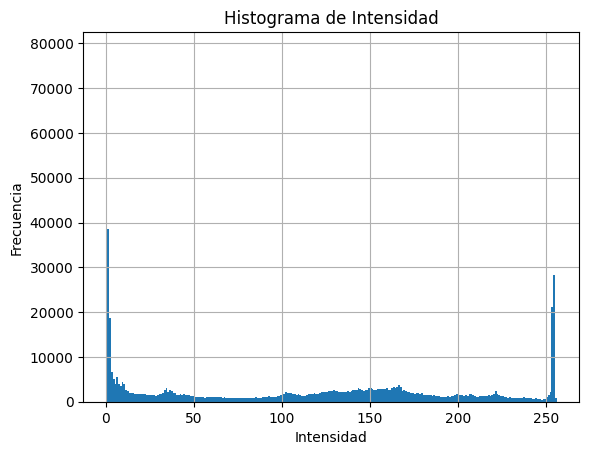

In [43]:
# 📊 Histograma de intensidades (escala de grises)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.hist(gris.ravel(), 256, [0,256])
plt.title('Histograma de Intensidad')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

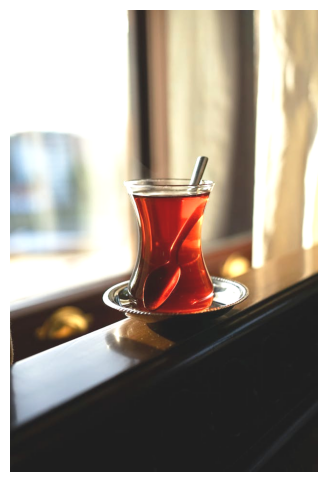

In [44]:
# 💡 Ajuste de brillo y contraste (manual)
alpha = 1.2  # Contraste (>1 aumenta)
beta = 30    # Brillo (+aumenta)

ajustada_manual = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
mostrar_img(ajustada_manual)

In [45]:
# 🎛️ BONUS: sliders para brillo y contraste (solo en local, no Colab)
def modificar(val):
    alpha = cv2.getTrackbarPos('Contraste', 'Control') / 10
    beta = cv2.getTrackbarPos('Brillo', 'Control') - 100
    ajustada = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    cv2.imshow('Ajuste', ajustada)

# # Comentado porque no funciona en Colab
# cv2.namedWindow('Control')
# cv2.createTrackbar('Contraste', 'Control', 10, 30, modificar)
# cv2.createTrackbar('Brillo', 'Control', 100, 200, modificar)
# modificar(0)
# cv2.waitKey(0)
# cv2.destroyAllWindows()